# Permutation Flow-Shop Scheduling Problem

This is a variant of the Flot-shop scheduling problem (FSSP) in which the sequence of jobs is the same in every machine.

$$
 \begin{align}
     \text{min} \quad & C_{\text{max}} \\
     \text{s.t.} \quad & x_{m-1, j} + p_{m, j} \leq x_{m, j}
         & \forall ~ j \in J; m \in (2, ..., |M|)\\
     & x_{m, j} + p_{m, j} \leq x_{m, k} \lor x_{m, k} + p_{m, k} \leq x_{m, j}
         & \forall ~ j \in J; k \in J, j \neq k\\
     & x_{|M|, j} + p_{|M|, j} \leq C_{\text{max}}
         & \forall ~ j \in J\\
     & x_{m, j} \geq 0 & \forall ~ j \in J; m \in M\\
     & z_{j, k} \in \{0, 1\} & \forall ~ j \in J; k \in J, j \neq k\\
 \end{align}
 $$

 You can compare this implementation to MILP solvers at the [end of the notebook](#bonus---milp-model).

In [9]:
import json

from bnbprob.pfssp import CallbackBnB, PermFlowShop, plot_gantt
from bnbprob.pfssp.mip import positional_model

# from bnbprob.pfssp.pypure.problem import PermFlowShop
from bnbpy import configure_logfile

In [2]:
configure_logfile("pfssp-bench.log", mode="w")

In [10]:
with open("./../data/flow-shop/reC11.json", mode="r", encoding="utf8") as f:
    p = json.load(f)

print(f"{len(p)} Jobs; {len(p[0])} Machines")

20 Jobs; 10 Machines


In [4]:
problem = PermFlowShop.from_p(p, constructive='neh')
bnb = CallbackBnB(
    eval_node='in', rtol=0.0001, restart_freq=200, save_tree=False
)

In [5]:
sol = bnb.solve(
    problem, maxiter=1000000, timelimit=600
)
print(sol)

Status: OPTIMAL | Cost: 1431 | LB: 1431


In [1]:
from bnbprob.pfssp.cython.job import PyJob
from bnbprob.pfssp.cython.sequence import PySigma
from bnbprob.pfssp.cython.permutation import Permutation
from bnbprob.pfssp.cython.heuristics import crosscheck_neh, local_search, crosscheck_combo
from bnbprob.pfssp.pypure.permutation import Permutation as PyPerm
from bnbprob.pfssp.pypure.heuristics import neh_constructive as neh

Cython imports failed
cannot import name 'Job' from 'bnbprob.pfssp.cython.job' (c:\Users\Bruno\Desktop\Python Packages\bnbpy\venv\Lib\site-packages\bnbprob\pfssp\cython\job.cp311-win_amd64.pyd)


In [2]:
job = PyJob.from_p(2, [1, 2, 3])

In [3]:
job.test_p(1, [1, 2, 3])

[[0, 0, 0], [0, 0, 0], [2, 0, 0]]

In [4]:
job.get_j()

2

In [5]:
for i in range(1000000):
    PyJob.from_p(2, [1, 2, 3])

In [6]:
job = PyJob.from_p(2, [1, 2, 3])
# del job

In [7]:
del job

In [2]:
p = [[5, 9, 7, 4], [9, 3, 3, 8], [8, 10, 5, 6], [1, 8, 6, 2]]

In [4]:
crosscheck_neh(p).calc_lb_full()

44

In [9]:
perm = Permutation.from_p(p)
# perm.update_params()

In [10]:
perm.get_free_jobs()[0].get_j()

0

In [11]:
perm.calc_lb_1m()

30

In [12]:
perm2 = perm.copy()
perm2.copy()

In [17]:
perm.update_params()

In [18]:
jobs = perm.get_free_jobs()

In [19]:
jobs[2].get_r(1)

8

In [20]:
perm.calc_lb_2m()

42

In [5]:
import json

with open("./../data/flow-shop/reC11.json", mode="r", encoding="utf8") as f:
    p = json.load(f)

In [7]:
crosscheck_combo(p).calc_lb_full()

1521

In [22]:
perm = Permutation.from_p(p)
for i in range(len(p)):
    perm.push_job(0)
perm.get_indexes()
print((perm).calc_lb_full())
# local_search(perm).calc_lb_full()

1850


In [23]:
perm = PyPerm.from_p(p)
neh(perm.free_jobs).calc_bound()

1550

In [9]:
import time

In [12]:
perm = Permutation.from_p(p)

s = time.time()

for _ in range(1000):
    other = perm.copy()
    for i in range(1):
        other.push_job(0)
    # perm.calc_lb_2m()

print(time.time() - s)

0.11499857902526855


In [13]:
perm = PyPerm.from_p(p)

s = time.time()

for _ in range(1000):
    other = perm.copy()
    for i in range(1):
        other.push_job(0)
    # perm.calc_lb_2m()

print(time.time() - s)

0.2089989185333252


In [10]:
perm.calc_lb_1m()

1352

In [17]:
perm = Permutation.from_p(p)
for i in range(len(p)):
    other = perm.copy()
    other.push_job(0)
    perm = other

In [19]:
perm

In [18]:
other.calc_lb_full()

1850

In [23]:
perm = PyPerm.from_p(p)

s = time.time()

for _ in range(10000):
    perm = Permutation.from_p(p)
    other = perm.copy()
    other.push_job(0)

print(time.time() - s)

0.7315201759338379


In [6]:
perm = Permutation.from_p(p)
permcopy = perm.copy()

print(perm.lower_bound_2m())
print(permcopy.lower_bound_2m())

perm.pypush_job(3)
print(perm.lower_bound_2m())
print(permcopy.lower_bound_2m())

42
42
42
42


In [4]:
print(perm.lower_bound_1m())
print(permcopy.lower_bound_1m())

39
39


In [7]:
perm.pypush_job(2)
print(perm.lower_bound_1m())
print(permcopy.lower_bound_1m())

46
39


In [2]:
p = [
    [1, 2, 3],
    [4, 5, 6]
]

In [3]:
perm = Permutation.from_p(p)

In [9]:
perm.get_sorted_seq()

In [14]:
j = perm.get_sorted_seq()

In [15]:
k = perm.get_free_jobs()

In [16]:
j[0].get_j()

1

In [17]:
k[0].get_j()

0

In [18]:
Permutation.from_p(p).get_free_jobs()[1].get_j()

1

In [ ]:
Permutation.from_p(p).get_free_jobs()[1].get_j()

In [2]:
job = PyJob.from_p(3, [4, 5, 6])

In [3]:
sigma = PySigma(3)

In [4]:
sigma.job_to_top(job)

In [5]:
sigma.get_jobs()[0].get_p(2)

6

In [12]:
sigma.get_jobs()[0].get_p(2)

6

In [7]:
job.get_lat(2, 0)

5

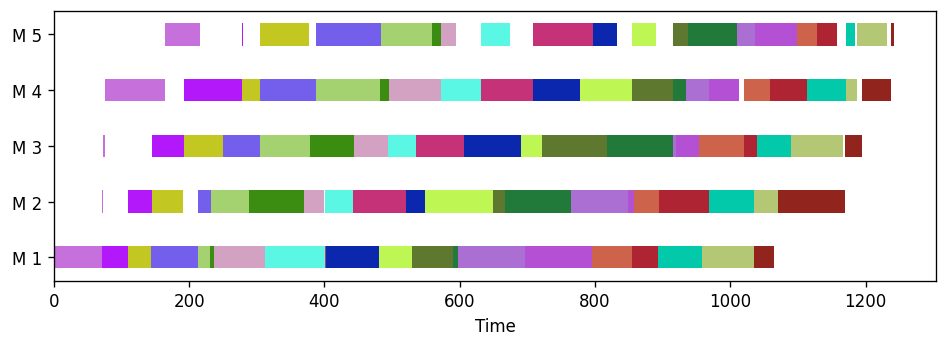

In [6]:
plot_gantt(sol.sequence, dpi=120, seed=42, figsize=[8, 3])

In [7]:
import pyomo.environ as pyo

model = positional_model(p)

# HiGHS
solver = pyo.SolverFactory('appsi_highs')
solver.options['mip_heuristic_effort'] = 0.1
solver.options['time_limit'] = 600
solver.options['log_file'] = 'Highs.log'
solver.solve(model, tee=True)

Running HiGHS 1.9.0 (git hash: fa40bdf): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [1e+00, 1e+02]
  Cost   [1e+00, 1e+00]
  Bound  [1e+00, 1e+00]
  RHS    [1e+00, 1e+00]
Presolving model
220 rows, 500 cols, 4758 nonzeros  0s
199 rows, 479 cols, 4197 nonzeros  0s

Solving MIP model with:
   199 rows
   479 cols (400 binary, 0 integer, 0 implied int., 79 continuous)
   4197 nonzeros

Src: B => Branching; C => Central rounding; F => Feasibility pump; H => Heuristic; L => Sub-MIP;
     P => Empty MIP; R => Randomized rounding; S => Solve LP; T => Evaluate node; U => Unbounded;
     z => Trivial zero; l => Trivial lower; u => Trivial upper; p => Trivial point

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
Src  Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   Cuts   InLp Confl. | LpIters     Time

         0       0         0   0.00%   411             

{'Problem': [{'Lower bound': 1242.0, 'Upper bound': 1242.0, 'Number of objectives': 1, 'Number of constraints': 0, 'Number of variables': 0, 'Sense': 'minimize'}], 'Solver': [{'Status': 'ok', 'Termination condition': 'optimal', 'Termination message': 'TerminationCondition.optimal'}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}